In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
from sklearn.model_selection  import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.4, random_state=23)


In [4]:
scaler = preprocessing.StandardScaler() 
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test) 
df_train=pd.DataFrame(X_train) 
df_train['price']=y_train 
df_train.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.408368,-0.511177,-0.867322,-0.30637,-0.322124,-0.376122,-1.158271,0.975013,-0.514591,-1.090186,0.797044,0.431450,-0.639886,21.1
1,-0.293865,-0.511177,-0.438618,-0.30637,-0.128143,-0.528845,-1.342010,0.273016,-0.629833,-0.595391,1.167024,0.326727,-0.840759,23.1
2,0.086377,-0.511177,1.008804,-0.30637,0.259819,-0.427030,0.961797,-0.651664,1.674989,1.544746,0.797044,-0.252221,1.229773,19.1
3,-0.352545,0.319537,-1.044617,-0.30637,0.791158,1.844337,0.781591,-0.840774,-0.514591,-0.851730,-2.532774,0.342565,-0.745239,43.1
4,-0.330906,-0.511177,-0.438618,-0.30637,-0.128143,-0.840278,0.078436,-0.058505,-0.629833,-0.595391,1.167024,0.369450,-0.180548,18.2


In [5]:
# Reference: https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
clf = SGDRegressor(n_iter=500) 
clf.fit(X_train, y_train) 
y_pred_SGD= clf.predict(X_test) 
MSE_SGD=mean_squared_error(y_test,y_pred_SGD)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [6]:
print(MSE_SGD)


22.27118806243705


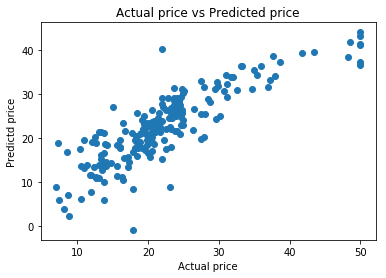

In [7]:
plt.scatter(y_test,y_pred_SGD) 
plt.xlabel('Actual price') 
plt.ylabel('Predictd price') 
plt.title('Actual price vs Predicted price') 
plt.show()


In [96]:
#Reference:https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochast ic-gradient-descent-1d35b088a843
W,B, Learn_rate,Num_iterations,k=np.zeros(shape=(1,13)),0,0.01,173,30
new_arr=[]
train_arr=[]
while Num_iterations>=0:   
    data_train=df_train.sample(k)  
    x=np.array(data_train.drop('price',axis=1))  
    y=np.array(data_train['price']) 
    for i in range(k): 
        w, b , diff_dw , diff_db = W,B, np.zeros(shape=(1,13)) ,0  
        diff_dw += (-2) * x[i]*(y[i]- np.dot(w,x[i])-b)      
        diff_db += (-2) *(y[i]- np.dot(w,x[i])-b) 
        #print(np.asscalar(y[i]- np.dot(w,x[i])-b)**2)
    
        W= (w - Learn_rate * (diff_dw/k)) 
        B= (b - Learn_rate * (diff_db/k))
   
    Num_iterations=Num_iterations-1 
    Y_pred=[]
    Y_pred_tr=[]
    for i in range(len(X_train)):  
        Y_obtained= np.dot(W,X_train[i]) + B   
        Y_pred_tr.append(np.asscalar(Y_obtained)) 
    train_arr.append(mean_squared_error(y_train,Y_pred_tr))
    for i in range(len(X_test)):  
        Y_obtained= np.dot(W,X_test[i]) + B   
        Y_pred.append(np.asscalar(Y_obtained)) 
    new_arr.append(mean_squared_error(y_test,Y_pred))
   
    

In [98]:
print("For test data")
print(min(new_arr),new_arr.index(min(new_arr)))
#hence epoch size is updated with 173,initially it was 200.
print("For training data")
print(min(train_arr),train_arr.index(min(train_arr)))

For test data
22.735176621358093 173
For training data
24.978915193814643 171


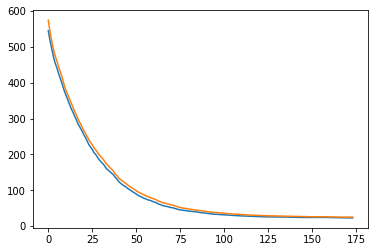

In [97]:
list_x=[i for i in range(174)]
plt.plot(list_x,new_arr)
plt.plot(list_x,train_arr)

In [99]:
print(mean_squared_error(y_test,Y_pred))


22.735176621358093


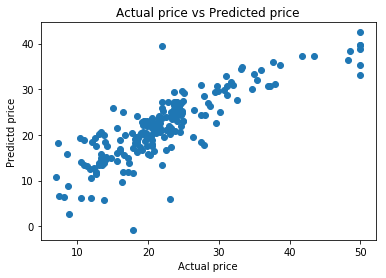

In [100]:
#Scatter plot for actual and predicted 
plt.scatter(y_test,Y_pred) 
plt.xlabel('Actual price') 
plt.ylabel('Predictd price') 
plt.title('Actual price vs Predicted price')
plt.show()


In [101]:
#coef_ is to find weights assigned in classifier, obtained from documentation of SGD classifier 
from prettytable import PrettyTable   
x = PrettyTable()
x.field_names=['Manually calculated Weight Vector','SGD sklearn Weight Vector'] 
weight_sgd=clf.coef_ 
for i in range(13):  
    x.add_row([W[0][i],weight_sgd[i]]) 
print(x)


+-----------------------------------+---------------------------+
| Manually calculated Weight Vector | SGD sklearn Weight Vector |
+-----------------------------------+---------------------------+
|        -0.42996505934110996       |    -0.7577865138928271    |
|         0.4465675043280928        |     0.8509914570134665    |
|        -0.2747822015742403        |    -0.08511769411093083   |
|         0.9314553812476808        |     0.8857032395524493    |
|        -0.5938328569488442        |     -2.06718840594972     |
|         3.235441006816779         |     2.9328270384807076    |
|        -0.4763443229645417        |    -0.0888855354852579    |
|         -1.756146680882337        |    -2.9865501111212027    |
|         0.5610781860247892        |     2.240785762437997     |
|        -0.15284025087854258       |    -1.1482172836750988    |
|        -1.6516322379002695        |    -1.8671733436788085    |
|         1.312104487915114         |     1.5232360046497986    |
|        -